# Green’s function estimation from ambient noise signals with limited illumination in 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
N = 10_000
mean = np.array([0, -200, 0])
cov = np.diag([100, 50, 100])
y = np.random.multivariate_normal(mean, cov, N)

X_1 = np.array([[0, 50*(j-1), 0] for j in range(1, 6)])
X_2 = np.array([[0, 5*(j-1), 0] for j in range(1, 6)])
X_3 = np.array([[50*(j-3), 100, 0] for j in range(1, 6)])

## 1. 

Let $\tau \in \mathbb{R}$ be the time lag between two signals. 

$$\displaystyle 
\begin{aligned}
C_N(\tau,\mathbf{x}_j,\mathbf{x}_1) &= \frac{1}{2\pi N} \sum_{s=1}^{N} \int_{-\infty}^{\infty}  \hat{F}(\omega)\overline{\hat{G}(\omega,\mathbf{x}_j,\mathbf{y}_s)}\hat{G}(\omega,\mathbf{x}_1,\mathbf{y}_s)e^{-i\omega\tau} \mathrm{d}\omega \\
&=\frac{1}{16\pi^2N}\sum_{s=1}^{N} \frac{1}{|\mathbf{x}_j-\mathbf{y}_s||\mathbf{x}_1-\mathbf{y}_s|}\frac{1}{2\pi}\int_{-\infty}^{\infty} \omega^2e^{-\omega^2}\exp{\left(-i\omega\left(\frac{|\mathbf{x}_j-\mathbf{y}_s|-|\mathbf{x}_1-\mathbf{y}_s|}{c_0}+\tau\right)\right)} \mathrm{d}\omega
\end{aligned}
$$

Let's define $g : \left\{\begin{aligned} \mathbb{R} &\to \mathbb{R} \\ t &\mapsto \frac{1}{\sqrt{4\pi}}e^{-t^2/4} \end{aligned}\right.$. 

It is a standard result that the Fourier transform of $g$ is $\hat{g} : \left\{\begin{aligned} \mathbb{R} &\to \mathbb{R} \\ \omega &\mapsto e^{-\omega^2} \end{aligned}\right.$.

Then, $\widehat{g''}(\omega) = - \omega^2 \hat{g}(\omega) = - \widehat{F}(\omega)$ for all $\omega \in \mathbb{R}$.

So, 
$$\displaystyle 
\boxed{\begin{aligned} 
C_N(\tau,\mathbf{x}_j,\mathbf{x}_1) 
&= -\frac{1}{16\pi^2N}\sum_{s=1}^{N} \frac{1}{|\mathbf{x}_j-\mathbf{y}_s||\mathbf{x}_1-\mathbf{y}_s|}g''\left(\frac{|\mathbf{x}_j-\mathbf{y}_s|-|\mathbf{x}_1-\mathbf{y}_s|}{c_0}+\tau\right)\end{aligned}}$$


In [3]:
def g_sec(t):
    t_squared = t**2
    return np.exp(-t_squared/2)*(t_squared-2)/(8*np.sqrt(np.pi))

def C_N(tau, x_1, x_2, y, c0=1):
    x_2_minus_y = np.linalg.norm(x_2-y, axis=1)
    x_1_minus_y = np.linalg.norm(x_1-y, axis=1)
    g_sec_term = g_sec((x_1_minus_y - x_2_minus_y) / c0 + tau) / (x_2_minus_y * x_1_minus_y)
    return -np.mean(g_sec_term)/(16*np.pi**2)

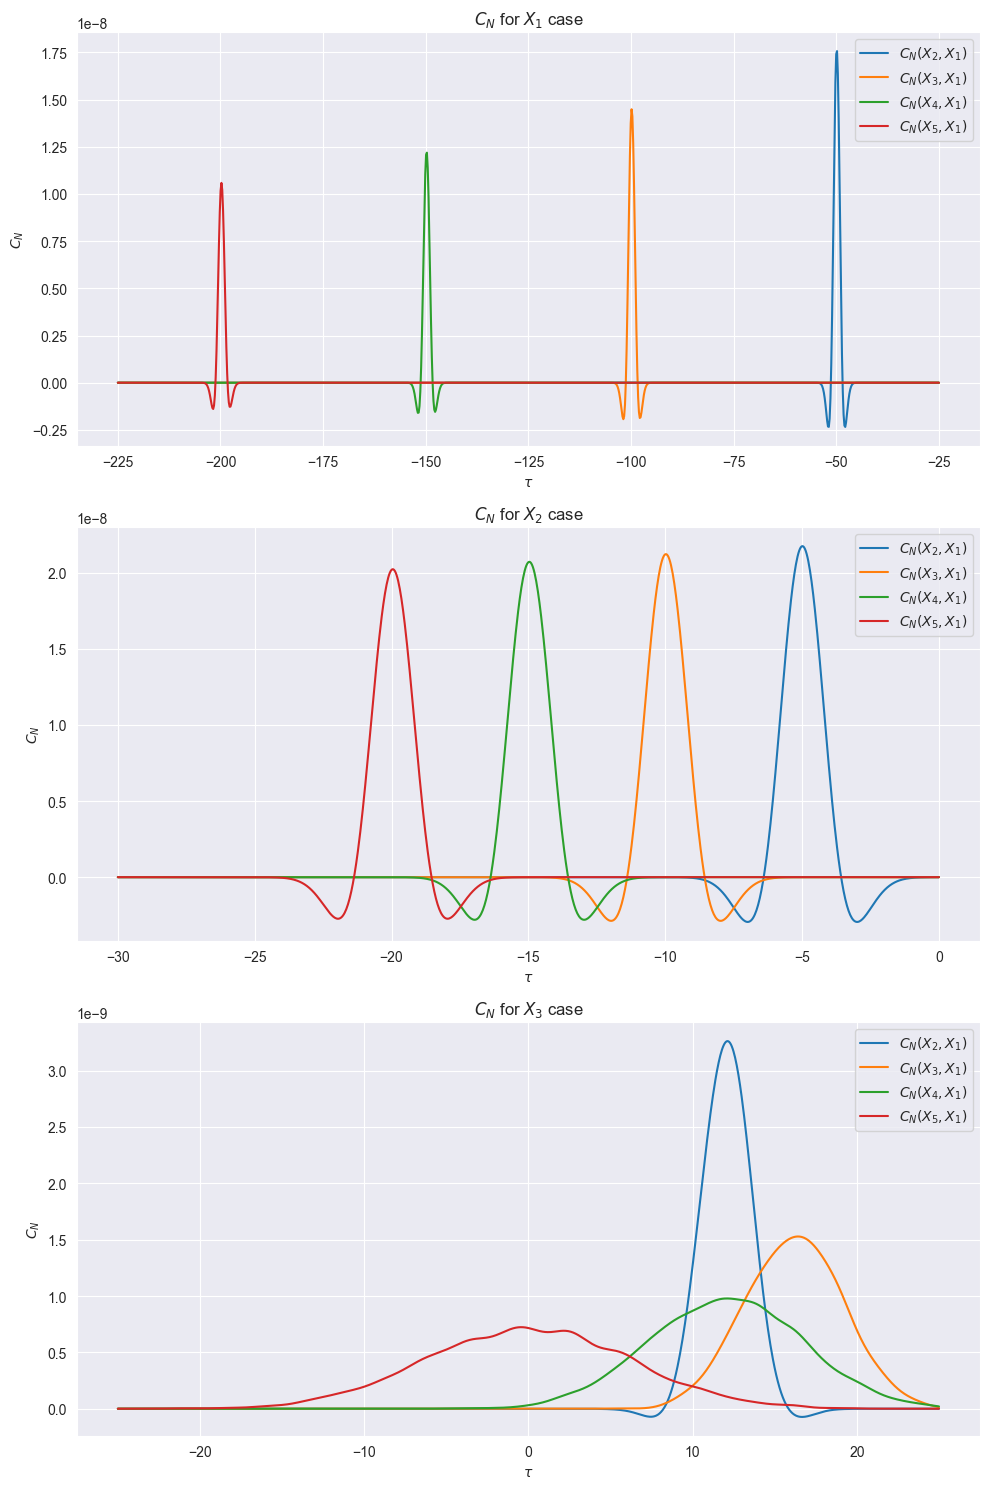

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

X_list = [X_1, X_2, X_3]
titles = ["$C_N$ for $X_1$ case", "$C_N$ for $X_2$ case", "$C_N$ for $X_3$ case"]
Tau = [np.linspace(-225, -25, 1000), np.linspace(-30, 0, 1000), np.linspace(-25, 25, 1000)]

for i, X in enumerate(X_list):
    C_N_values = [np.array([C_N(tau, X[j], X[0], y) for tau in Tau[i]]) for j in range(1, 5)]
    for j, C_N_val in enumerate(C_N_values):
        axs[i].plot(Tau[i], C_N_val, label=f"$C_N(X_{{{j+2}}},X_1)$")
    axs[i].legend()
    axs[i].set_xlabel("$\\tau$")
    axs[i].set_ylabel("$C_N$")
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()


Here, we suppose that the celerity of the waves is $c_0 = 1$. On average, the source points are at location $\mathbf{\mu} = (0,-200,0)$ which is on the $y$-axis.

- In experiment 1 and 2 : The receivers are all aligned according the the $y$-axis, and with $\mathbf{\mu}$. Therefore, it is expected that the received signals for 2 receivers $\mathbf{x}_i$ and $\mathbf{x}_j$ will be the same (only the amplitude will change) but with a delay $\tau = \frac{|\mathbf{x}_i-\mathbf{\mu}|-|\mathbf{x}_j-\mathbf{\mu}|}{c_0}$ (time for the signal to travel from $\mathbf{x}_i$ to $\mathbf{x}_j$).

- In experiment 3 : The receivers are not aligned with $\mathbf{\mu}$, so the received signals will be different.

## 2.

Let us fix $t\in\mathbb{R},\mathbf{x}\in\mathbb{R}^3$.

$$\begin{aligned}
u(t,\mathbf{x}) 
&= \int_{\mathbb{R}^3}\int_{\mathbb{R}} G(t',\mathbf{x},\mathbf{y})n(t',\mathbf{y})\mathrm{d}t~\mathrm{d}\mathbf{y} \\
&= \int_{\mathbb{R}^3}\int_{\mathbb{R}} G(t',\mathbf{x},\mathbf{y})\frac
{1}{\sqrt{N}}\sum_{s=1}^Nn_s(t')\delta(\mathbf{y}-\mathbf{y}_s)\mathrm{d}t~\mathrm{d}\mathbf{y} \\
&=\frac{1}{\sqrt{N}}\sum_{s=1}^N\int_{\mathbb{R}}G(t',\mathbf{x},\mathbf{y}_s)n_s(t')\mathrm{d}t' \\
&=\frac{1}{\sqrt{N}}\sum_{s=1}^N\int_{\mathbb{R}}\frac{1}{4\pi|\mathbf{x}-\mathbf{y}_s|}\delta\left(t-\frac{|\mathbf{x}-\mathbf{y}_s|}{c_0}-t'\right)n_s(t')\mathrm{d}t' \\
&=\frac{1}{4\pi\sqrt{N}}\sum_{s=1}^N\frac{1}{|\mathbf{x}-\mathbf{y}_s|}n_s\left(t-\frac{|\mathbf{x}-\mathbf{y}_s|}{c_0}\right)\mathrm{d}t' \\
\end{aligned}
$$

Therefore, for $\tau\in\mathbb{R}$,

$$
\boxed{u(t,\mathbf{x}_1)u(t+\tau,\mathbf{x}_2) = \frac{1}{16\pi^2N}\sum_{s=1}^N\sum_{s'=1}^N\frac{1}{|\mathbf{x}_1-\mathbf{y}_s||\mathbf{x}_2-\mathbf{y}_{s'}|}n_s\left(t-\frac{|\mathbf{x}_1-\mathbf{y}_s|}{c_0}\right)n_{s'}\left(t+\tau-\frac{|\mathbf{x}_2-\mathbf{y}_{s'}|}{c_0}\right)}
$$

Moreover, we can verify that we have indeed $\mathbb{E}\left[C_{T,N}(\tau,\mathbf{x}_1,\mathbf{x}_2)\right] = C_N(\tau,\mathbf{x}_1,\mathbf{x}_2)$. 

For that, one only has to remark that $\mathbb{E}\left[n_s(t_1)n_{s'}(t_2)\right] = \left\{\begin{aligned} F(t_1-t_2) \quad&\text{ if }s=s' \\ 0 \quad&\text{ otherwise} \end{aligned}\right.$

Then, we have 
$$\begin{aligned}
\mathbb{E}\left[C_{T,N}(\tau,\mathbf{x}_1,\mathbf{x}_2)\right] 
&= \frac{1}{T-|\tau|}\int_0^{T-|\tau|}\mathbb{E}\left[u(t,\mathbf{x}_1)u(t+\tau,\mathbf{x}_2)\right]\mathrm{d}t \\
&= \frac{1}{T-|\tau|}\int_0^{T-|\tau|}\frac{1}{16\pi^2N}\sum_{s=1}^N\frac{1}{|\mathbf{x}_1-\mathbf{y}_s||\mathbf{x}_2-\mathbf{y}_{s}|}F\left(t-\frac{|\mathbf{x}_1-\mathbf{y}_s|}{c_0}-t-\tau+\frac{|\mathbf{x}_2-\mathbf{y}_{s}|}{c_0}\right)\mathrm{d}t \\
&= \frac{1}{16\pi^2N}\sum_{s=1}^N\frac{1}{|\mathbf{x}_1-\mathbf{y}_s||\mathbf{x}_2-\mathbf{y}_{s}|}F\left(\frac{|\mathbf{x}_1-\mathbf{y}_s| - |\mathbf{x}_2-\mathbf{y}_{s}|}{c_0}-\tau\right)\frac{1}{T-|\tau|}\int_0^{T-|\tau|}\mathrm{d}t \\
&= C_N(\tau,\mathbf{x}_1,\mathbf{x}_2) &\text{ ($F$ is even and $F=-g$)}
\end{aligned}
$$

In [26]:
def F(t):
    return -np.exp(-t**2/2)*(t**2-2)/(8*np.sqrt(np.pi)) #= -g_sec(t)

def generate_gaussian_processes(N, t, F):
    """Returns: gp_realizations : (N, Nt) array where each column is a realization at a location y_s"""
    Nt = len(t)  # Number of time steps
    C = np.zeros((Nt, Nt))
    for i in range(Nt):
        for j in range(i, Nt):
            C[i, j] = F(t[i] - t[j])
            if i != j:
                C[j, i] = C[i, j]
    L = np.linalg.cholesky(C + 1e-6 * np.eye(Nt))  # Cholesky decomposition - Add small noise for numerical stability
    Z = np.random.randn(Nt, N) 
    gp_realizations = L @ Z 
    return gp_realizations.T # Shape (N,Nt)

In [ ]:
c0, tau = 1, 0

In [29]:
from tqdm import tqdm

def C_T_N(tau, x_1, x_2, y, c0=1, T=10, dt=0.1):
    x_2_minus_y = np.linalg.norm(x_2-y, axis=1) # Shape (N,)
    x_1_minus_y = np.linalg.norm(x_1-y, axis=1) # Shape (N,)
    t_max = T - min(np.min(x_1_minus_y) / c0, np.min(x_2_minus_y) / c0) + max(0,tau)
    t_min = -max(np.max(x_1_minus_y) / c0, np.max(x_2_minus_y) / c0) + min(0,tau)
    t_k = np.arange(0, T, dt)  # Shape (T,)
    t_interp = np.arange(t_min, t_max, dt)  # Shape (T,)
    Nt = len(t_k)
    Corr_t_k = np.zeros((Nt))
    n_s_tk = generate_gaussian_processes(N, t_interp, F) # Shape (N, T)
    factor_matrix = 1 / np.outer(x_1_minus_y, x_2_minus_y) # Shape (N, N)
    delayed_n_s = np.array([np.interp(t_k - x_1_minus_y[s] / c0, t_interp, n_s_tk[s]) for s in range(N)]) # Shape (N, T)
    delayed_n_s_p = np.array([np.interp(t_k + tau - x_2_minus_y[s_p] / c0, t_interp, n_s_tk[s_p]) for s_p in range(N)]) # Shape (N, T)
    for t in tqdm(range(Nt)):
        Corr_t_k[t] = np.sum(factor_matrix * np.outer(delayed_n_s[:,t],delayed_n_s_p[:,t])) 
    return np.sum(Corr_t_k) / (16 * N * np.pi**2 * Nt)

In [ ]:
idx_1, idx_2 = 0, 1
x1, x2 = X_1[idx_1], X_1[idx_2]
C_T_N_values = [C_T_N(tau, X_1[j], X_1[0], y) for j in range(1, 6)]
plt.plot(C_T_N_values)

In [ ]:
C_N = C_N(-50, X_1[1], X_1[0], y)

100%|██████████| 500/500 [07:07<00:00,  1.17it/s]


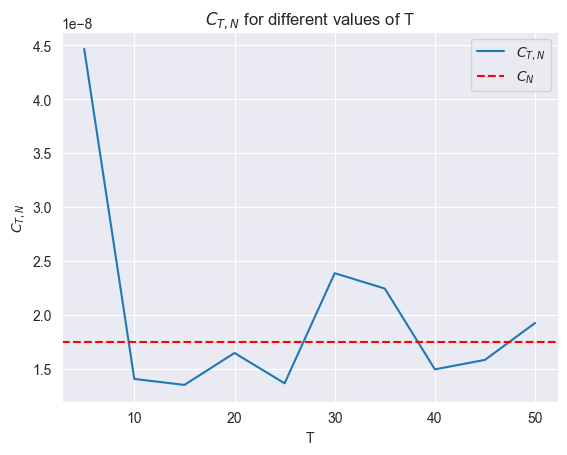

In [40]:
T_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
C_T_N_results = []

for T in T_values:
    C_T_N_result = C_T_N(-50, X_1[1], X_1[0], y, T=T, dt=0.1)
    C_T_N_results.append(C_T_N_result)

plt.plot(T_values, C_T_N_results,  label='$C_{T,N}$')
plt.axhline(y=C_N, color='r', linestyle='--', label='$C_N$')
plt.legend()
plt.xlabel('T')
plt.ylabel('$C_{T,N}$')
plt.title('$C_{T,N}$ for different values of T')
plt.show()

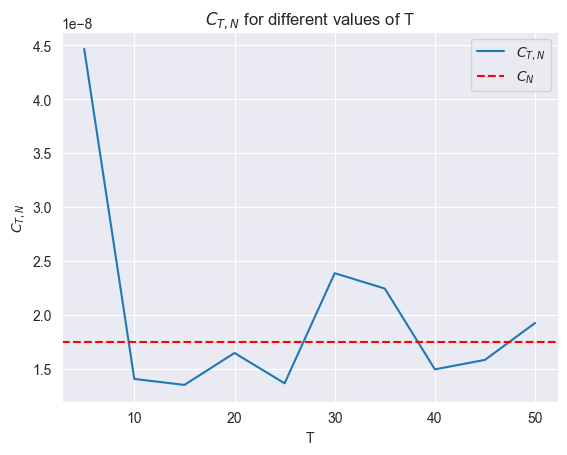

In [41]:
plt.plot(T_values, C_T_N_results,  label='$C_{T,N}$')
plt.axhline(y=C_N, color='r', linestyle='--', label='$C_N$')
plt.legend()
plt.xlabel('T')
plt.ylabel('$C_{T,N}$')
plt.title('$C_{T,N}$ for different values of T')
plt.show()